In [2]:
import pandas as pd
import numpy as np
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import os
os.environ['R_HOME'] = '/root/miniconda3/envs/R/lib/R'

import rpy2.robjects as objects
from rpy2.robjects.packages import importr
base = importr('base')
r_pROC = importr("pROC")
base._libPaths()[0]

def df_stats(df):
    from tabulate import tabulate
    print("\n***** Shape: ", df.shape," *****\n")
    
    columns_list = df.columns.values.tolist()
    isnull_list = df.isnull().sum().values.tolist()
    isunique_list = df.nunique().values.tolist()
    dtypes_list = df.dtypes.tolist()
    
    list_stat_val = list(zip(columns_list, isnull_list, isunique_list, dtypes_list))
    df_stat_val = pd.DataFrame(list_stat_val, columns=['Name', 'Null', 'Unique', 'Dtypes'])
    print(tabulate(df_stat_val, headers='keys', tablefmt='psql'))
    return df.head()



/tmp/ipykernel_205570/2198434195.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
data = pd.read_csv('data/audit-inference-20210803-20230803.csv')

In [4]:

# Drop the unnecessary index column
data = data.drop(columns=['Unnamed: 0'])

# Groupby 'StudyInstanceUID' and keep the first 'PatientID' for each unique 'StudyInstanceUID'
data = data.groupby('StudyInstanceUID').first().reset_index()

# Add 'Status' and 'QueryRetrieveLevel' columns
data['Status'] = '0x0'
data['QueryRetrieveLevel'] = 'STUDY'

# Reorder columns to match the desired format
data = data[['PatientID', 'QueryRetrieveLevel', 'Status', 'StudyInstanceUID']]

data.head()


,PatientID,QueryRetrieveLevel,Status,StudyInstanceUID
0,183774,STUDY,0x0,1.3.12.2.1107.5.4.5.135214.30000023020211373582800000022
1,624901,STUDY,0x0,1.3.12.2.1107.5.4.5.140409.30000023052511290500900000001
2,490419,STUDY,0x0,1.3.12.2.1107.5.4.5.147598.30000023070510560571700000017
3,615116,STUDY,0x0,1.3.46.670589.29.18771927773542520221026164809519
4,563528,STUDY,0x0,1.3.6.1.4.1.23849.3236648407.188.1638239820133743431


In [5]:
#data.to_csv('data/audit-inference-20210803-20230803.csv')

In [6]:
df_new = pd.DataFrame()
df_new['PateintID'] = df['Patient ID']
#df_new['QueryRetrieveLevel'] = 'SERIES'
df_new['StudyInstanceUID'] = df['Study UID']
df_new['SeriesInstanceUID'] = df['Series UID']
display(df_new)
df_new.to_csv('data/audit-inference-20210803-20230803.csv')

NameError: name 'df' is not defined

9411

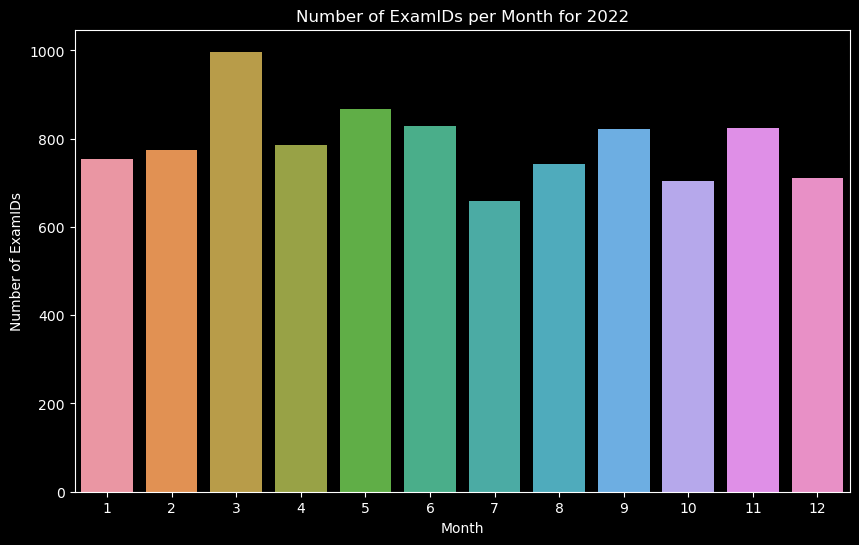

In [7]:
#2022 angiogram c-find
df_xa = pd.read_csv('data/database-c-find_TTE2022_20220101-20221231.XA2.csv')
df_xa['StudyDate'] = pd.to_datetime(df_xa['StudyDate'], format='%Y%m%d')
display(df_xa.StudyInstanceUID.nunique())
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_xa is your DataFrame with 'StudyDate'
# Adding a column to represent the month
df_xa['Month'] = df_xa['StudyDate'].dt.month

# Grouping by month and counting the number of ExamIDs
monthly_counts = df_xa.groupby('Month').size().reset_index(name='Number of ExamIDs')

# Plotting the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Number of ExamIDs', data=monthly_counts)
plt.title('Number of ExamIDs per Month for 2022')
plt.xlabel('Month')
plt.ylabel('Number of ExamIDs')
plt.show()


## Analysis C-Find

In [8]:
df = pd.read_csv('data/databse-c-find-CathEF.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/databse-c-find-CathEF.csv'

In [9]:
df_stats(df)

NameError: name 'df' is not defined

## Check extraction

In [10]:
df_cathef = pd.read_csv('data/audit-inference-20210803-20230803_extract.csv')

In [11]:
display(df_stats(df_cathef))


***** Shape:  (281, 4)  *****

+----+--------------------+--------+----------+----------+
|    | Name               |   Null |   Unique | Dtypes   |
|----+--------------------+--------+----------+----------|
|  0 | PatientID          |      0 |      208 | object   |
|  1 | QueryRetrieveLevel |      0 |        1 | object   |
|  2 | Status             |      0 |        3 | object   |
|  3 | StudyInstanceUID   |      0 |      213 | object   |
+----+--------------------+--------+----------+----------+


,PatientID,QueryRetrieveLevel,Status,StudyInstanceUID
0,611607,STUDY,0xb000,2.16.124.113611.1.118.1.1.6216937
1,338446,STUDY,0xb000,2.16.124.113611.1.118.1.1.6197718
2,627793,STUDY,0xb000,2.16.124.113611.1.118.1.1.6537060
3,183774,STUDY,0xb000,1.3.12.2.1107.5.4.5.135214.30000023020211373582800000022
4,611607,STUDY,0x0,2.16.124.113611.1.118.1.1.6216937


In [12]:
data = pd.read_csv('data/audit-inference-20210803-20230803.csv')
display(df_stats(data))


***** Shape:  (219, 5)  *****

+----+--------------------+--------+----------+----------+
|    | Name               |   Null |   Unique | Dtypes   |
|----+--------------------+--------+----------+----------|
|  0 | Unnamed: 0         |      0 |      219 | int64    |
|  1 | PatientID          |      0 |      214 | object   |
|  2 | QueryRetrieveLevel |      0 |        1 | object   |
|  3 | Status             |      0 |        1 | object   |
|  4 | StudyInstanceUID   |      0 |      219 | object   |
+----+--------------------+--------+----------+----------+


,Unnamed: 0,PatientID,QueryRetrieveLevel,Status,StudyInstanceUID
0,0,183774,STUDY,0x0,1.3.12.2.1107.5.4.5.135214.30000023020211373582800000022
1,1,624901,STUDY,0x0,1.3.12.2.1107.5.4.5.140409.30000023052511290500900000001
2,2,490419,STUDY,0x0,1.3.12.2.1107.5.4.5.147598.30000023070510560571700000017
3,3,615116,STUDY,0x0,1.3.46.670589.29.18771927773542520221026164809519
4,4,563528,STUDY,0x0,1.3.6.1.4.1.23849.3236648407.188.1638239820133743431


In [22]:
from tqdm import tqdm
import os
import pydicom
import pandas as pd

def scan_dicoms_and_append_to_dataframe(root_folder, output_folder='.'):
    # Creating a list to hold DICOM information
    dicom_list = []

    # Gathering all the DICOM files first to have an accurate progress bar
    dicom_files = [os.path.join(subdir, file) for subdir, _, files in os.walk(root_folder) for file in files if file.endswith('.dcm')]
    print(len(dicom_files))
    # Iterating through the DICOM files with a progress bar
    for file_path in tqdm(dicom_files, desc='Scanning DICOMs'):
        # Reading the DICOM file
        dicom_data = pydicom.dcmread(file_path)

        # Extracting PatientID and StudyInstanceUID
        patient_id = dicom_data.PatientID
        study_instance_uid = dicom_data.StudyInstanceUID

        # Appending the information to the list
        dicom_list.append({
            'PatientID': patient_id,
            'StudyInstanceUID': study_instance_uid,
            'FilePath': file_path
        })

    # Creating a DataFrame from the list
    dicom_df = pd.DataFrame(dicom_list, columns=['PatientID', 'StudyInstanceUID', 'FilePath'])

    # Create a folder to store the data if it doesn't exist
    if not os.path.exists(os.path.join(output_folder, 'CathEF_Prospective')):
        os.makedirs(os.path.join(output_folder, 'CathEF_Prospective'))

    # Saving the DataFrame to a CSV file in the CathEF_Prospective folder
    output_path = os.path.join(output_folder, 'CathEF_Prospective', 'dicom_data.csv')
    dicom_df.to_csv(output_path, index=False)

    return dicom_df


In [16]:

# Using the function
root_folder = '/media/data1/ravram/CathEF_Prospective'
dicom_df = scan_dicoms_and_append_to_dataframe(root_folder)


5119


Scanning DICOMs: 100%|██████████| 5119/5119 [01:46<00:00, 48.17it/s] 


In [23]:
output_folder = "."
print(os.path.exists(os.path.join(output_folder, 'CathEF_Prospective')))

False


In [25]:
#dicom_df.to_csv('../Oread/data/CathEF_Prospective/CathEF_inference-20210803-20230803_dicom_data.csv')